In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mig
import numpy as np
import cv2
import keras
from keras.utils import to_categorical
from keras.models import Input,Sequential, Model
from keras.layers import Dense ,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
data=pd.read_csv('fer20131.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [4]:
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [5]:
train=data[['emotion','pixels']][data["Usage"]=='Training']
train['pixels']=train['pixels'].apply(lambda i :np.fromstring(i,sep=' '))

In [6]:
train.head()

,emotion,pixels
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...."
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111..."
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161..."
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...."
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
pbtest=data[['emotion','pixels']][data["Usage"]=='PublicTest']
pbtest['pixels']=pbtest['pixels'].apply(lambda i : np.fromstring(i,sep=' '))

In [8]:
prtest=data[['emotion','pixels']][data["Usage"]=='PrivateTest']
prtest['pixels']=prtest['pixels'].apply(lambda i : np.fromstring(i,sep=' '))

In [9]:
pbtest = pbtest.reset_index(drop=True)
prtest = prtest.reset_index(drop=True)

pbtest.head()

,emotion,pixels
0,0,"[254.0, 254.0, 254.0, 254.0, 254.0, 249.0, 255..."
1,1,"[156.0, 184.0, 198.0, 202.0, 204.0, 207.0, 210..."
2,4,"[69.0, 118.0, 61.0, 60.0, 96.0, 121.0, 103.0, ..."
3,6,"[205.0, 203.0, 236.0, 157.0, 83.0, 158.0, 120...."
4,3,"[87.0, 79.0, 74.0, 66.0, 74.0, 96.0, 77.0, 80...."


In [10]:
prtest.head()

,emotion,pixels
0,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
1,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
2,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
3,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
4,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [11]:
pr_xtest=np.vstack(prtest['pixels'].values)
pr_ytest=np.array(prtest['emotion'].values)

In [12]:
pr_xtest

array([[170., 118., 101., ..., 159., 133., 131.],
       [  7.,   5.,   8., ...,  72.,  57.,  52.],
       [232., 240., 241., ...,   4.,   4.,   9.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [13]:
pr_ytest

array([0, 5, 6, ..., 0, 3, 2], dtype=int64)

In [14]:
pr_ytest=to_categorical(pr_ytest)
pr_ytest

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [16]:
Xtrain=np.vstack(train['pixels'].values)
Ytrain=np.array(train['emotion'].values)
Xtest=np.vstack(pbtest['pixels'].values)
Ytest=np.array(pbtest['emotion'].values)

In [17]:
Xtrain

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 74.,  81.,  87., ..., 188., 187., 187.],
       [222., 227., 203., ..., 136., 136., 134.],
       [195., 199., 205., ...,   6.,  15.,  38.]])

In [18]:
Xtest

array([[254., 254., 254., ...,  42., 129., 180.],
       [156., 184., 198., ..., 172., 167., 161.],
       [ 69., 118.,  61., ...,  88.,  87.,  90.],
       ...,
       [255., 255., 255., ...,  48.,  50.,  46.],
       [ 33.,  25.,  31., ...,   4.,   5.,   4.],
       [ 61.,  63.,  59., ..., 113., 165., 180.]])

In [19]:
Ytrain

array([0, 0, 2, ..., 4, 0, 4], dtype=int64)

In [20]:
Ytest

array([0, 1, 4, ..., 4, 4, 4], dtype=int64)

In [21]:
Ytrain=to_categorical(Ytrain)
Ytest=to_categorical(Ytest)

Ytrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
Ytest

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [23]:
Xtrain.shape

(28709, 2304)

In [24]:
Xtest.shape

(3589, 2304)

In [25]:
Xtrain=Xtrain.reshape(-1,48,48,1)
Xtest=Xtest.reshape(-1,48,48,1)

In [26]:
Xtrain.shape

(28709, 48, 48, 1)

In [27]:
Xtest.shape

(3589, 48, 48, 1)

In [28]:
batch_size=128
epochs=10
number_of_classes=7

In [29]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',
                 input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(number_of_classes,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
leak

In [30]:
trained_model=model.fit(Xtrain, Ytrain, batch_size=batch_size,
                        epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Instructions for updating:
Use tf.cast instead.
Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 13s 462us/step - loss: 1.8469 - acc: 0.2838 - val_loss: 1.6265 - val_acc: 0.3369
Epoch 2/10
28709/28709 [==============================] - 11s 378us/step - loss: 1.4559 - acc: 0.4299 - val_loss: 1.4822 - val_acc: 0.4213
Epoch 3/10
28709/28709 [==============================] - 11s 378us/step - loss: 1.2811 - acc: 0.5053 - val_loss: 1.3362 - val_acc: 0.4971
Epoch 4/10
28709/28709 [==============================] - 11s 379us/step - loss: 1.1498 - acc: 0.5646 - val_loss: 1.2979 - val_acc: 0.5079
Epoch 5/10
28709/28709 [==============================] - 11s 378us/step - loss: 1.0422 - acc: 0.6091 - val_loss: 1.3572 - val_acc: 0.4896
Epoch 6/10
28709/28709 [==============================] - 11s 378us/step - loss: 0.9402 - acc: 0.6472 - val_loss: 1.3743 - val_acc: 0.5035
Epoch 7/10
28709/28709 [==============================] - 11s 378us/s

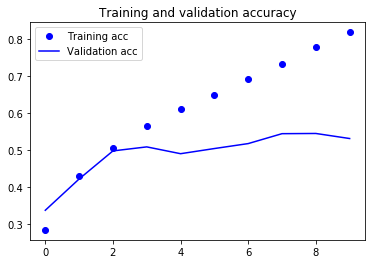

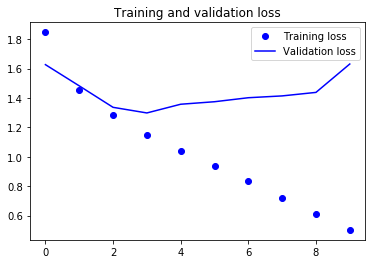

In [31]:
model.save('facial_1')

acc = trained_model.history['acc']
val_acc = trained_model.history['val_acc']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
pr_xtest=pr_xtest.reshape(-1,48,48,1)
score = model.evaluate(pr_xtest, pr_ytest, verbose=0)
print ("model %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

model acc: 52.47%


In [33]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(number_of_classes, activation='softmax'))

# optimizer:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        36928     
__________

In [34]:
print ('Training....')
#fit
nb_epoch = 10
batch_size = 128

trained_model_2 = model2.fit(Xtrain, Ytrain, epochs=nb_epoch, 
                             batch_size=batch_size, validation_data=(Xtest, Ytest), verbose=1)

Training....
Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 19s 679us/step - loss: 1.7917 - acc: 0.2687 - val_loss: 1.6682 - val_acc: 0.3355
Epoch 2/10
28709/28709 [==============================] - 18s 644us/step - loss: 1.5152 - acc: 0.4109 - val_loss: 1.3949 - val_acc: 0.4748
Epoch 3/10
28709/28709 [==============================] - 19s 646us/step - loss: 1.3163 - acc: 0.5025 - val_loss: 1.2696 - val_acc: 0.5205
Epoch 4/10
28709/28709 [==============================] - 19s 645us/step - loss: 1.1964 - acc: 0.5444 - val_loss: 1.1909 - val_acc: 0.5545
Epoch 5/10
28709/28709 [==============================] - 19s 645us/step - loss: 1.0980 - acc: 0.5892 - val_loss: 1.1963 - val_acc: 0.5525
Epoch 6/10
28709/28709 [==============================] - 19s 645us/step - loss: 1.0195 - acc: 0.6223 - val_loss: 1.1192 - val_acc: 0.5874
Epoch 7/10
28709/28709 [==============================] - 19s 645us/step - loss: 0.9305 - acc: 0.6553 - 

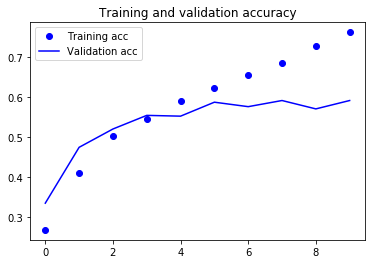

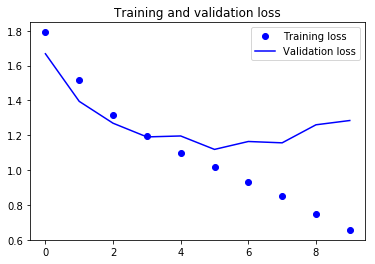

In [35]:
model2.save('facial_2')

acc = trained_model_2.history['acc']
val_acc = trained_model_2.history['val_acc']
loss = trained_model_2.history['loss']
val_loss = trained_model_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
score = model2.evaluate(pr_xtest, pr_ytest, verbose=0)
print ("model 2 %s: %.2f%%" % (model2.metrics_names[1], score[1]*100))

model 2 acc: 58.96%
